# Data Experiments

In [1]:
import pandas as pd

## Data Imbalance
In this section we carry out an experiment to view the imbalance of our dataset. We are expecting our dataset to be imbalanced as spam on YouTube is less common than relevant or neutral comments. We graph the number of occurences of the different classes in our dataset and make evaluations of the imbalance. We then discuss how we will combat issues created by having an imbalanced dataset.

### Reading the Data
The data is read from the `combinedmorespam-dataset-labelled.csv` file located in the `data/labelled` folder of the project. This is read into **pandas** data frame, and the counts of the classes are stored.

In [2]:
dataset = pd.read_csv('../data/labelled/combinedmorespam-dataset-labelled.csv')

counts = dataset['class'].value_counts()
count_list = [counts['spam'], counts['ham'], counts['neutral']]
total = sum(count_list)

classes = ['spam', 'ham', 'neutral']
percentage = [counts['spam']/total * 100, counts['ham']/total* 100, counts['neutral']/total * 100]
percentage = ['%.2f' % item for item in percentage]

print("Occurences of each Class:")
print(f"Spam: {counts['spam']}")
print(f"Ham: {counts['ham']}")
print(f"Neutral: {counts['neutral']}")

print("\nPercentage of Dataset of each Class")
print(f"Spam: {percentage[0]}%")
print(f"Ham: {percentage[1]}%")
print(f"Neutral: {percentage[2]}%")


Occurences of each Class:
Spam: 218
Ham: 3602
Neutral: 603

Percentage of Dataset of each Class
Spam: 4.93%
Ham: 81.44%
Neutral: 13.63%


### Visualising the Data
In order to better represent the data, we plot the three classes on a bar chart using **matplotlib**.

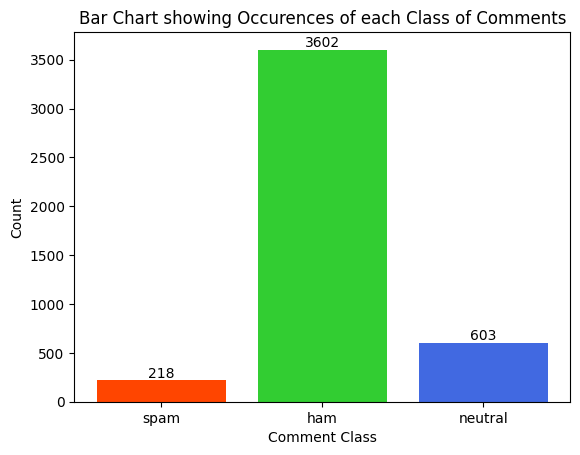

In [3]:
import matplotlib.pyplot as plt

colours = ['#FF4500', '#32CD32', '#4169E1']

fig, ax = plt.subplots()
bars = ax.bar(classes, count_list, color=colours)
ax.bar_label(bars)
plt.title("Bar Chart showing Occurences of each Class of Comments")
plt.xlabel("Comment Class")
plt.ylabel("Count")
plt.show()

We also plotted the data on a pie chart, in order to more easily see what percentage of the dataset each class makes up.

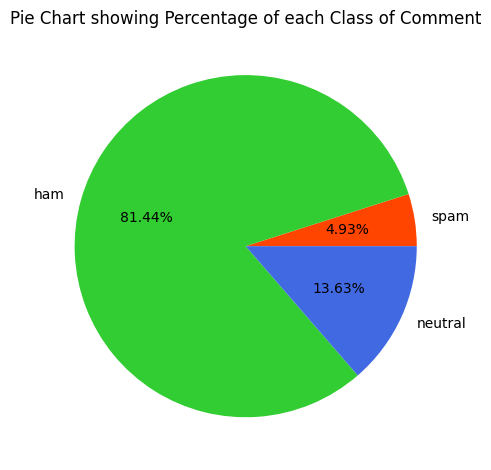

In [4]:
fig, ax = plt.subplots()
ax.pie(count_list, labels=classes, colors=colours, autopct='%.2f%%')
plt.title("Pie Chart showing Percentage of each Class of Comment")
plt.tight_layout()

### Results
As seen in the data there is a clear imbalance in the classes. With the *ham* class being our majority class, representing 81.44% of the data with 3602 occurences. The *spam* class is our minority class, with only 218 occurences representing just less than 5% of the dataset. Whilst there is an obvious imbalance, it is only a moderate imbalance.

#### How to Deal with the Imbalance
As we were expecting our data to be imbalance, due to the nature of spam comments, we had planned from the start to accomodate this. Whilst we could make use of resampling techniques to downsample the majority class, we decided against this as this would drastically reduce our dataset and cause a loss of information. Additionally, we could have decided to upsample our minority classes, but this can result in overfitting of our model, which we do not want as we want our model to learn the relationship between context and the comments.

Therefore, we decided we would simply train our dataset keeping the data imbalance, a moderate imbalance should not cause too many issues if we take steps to combat it. Firstly, when splitting our dataset for into training and testing, we will make sure get splits that are proportional to our dataset. Additionally, we train our model for many epochs, this ensures that the model will see plenty of the minority classes ensuring the weights will be updated.

We believe employing these methods is enough to combat the moderate data imbalance of our dataset. Additionally, this imbalance is the same as seen in the real world, so the model will view each class in this proportions that it will see in the real world.

## Data Reliability
In this section we carry out a couple of experiments in order to measure the reliability of our dataset. As our dataset was annotated by two labellers, in these tests we got the annotaters to label the same pieces of data, thus allowing us to measure the differences between the two annotaters and assess their reliability.

### Reading the Data
The two datasets that were relabelled are read in into `ann_1` and `ann_2` respectively. Then the corresponding entries from the real dataset are collected and the dataframes are combined to create two dataframes, each holding 200 labels made by annotater 1 and annotator 2 individually on the same data.

In [5]:
ann_1 = pd.read_csv('../data/reliability/sam-reliability-labelled.csv')
ann_2 = pd.read_csv('../data/reliability/tony-reliability-labelled.csv')
df_ann_1_2 = pd.read_csv('../data/labelled/sam-dataset-labelled.csv')
ann_1_2 = df_ann_1_2[df_ann_1_2['comment_id'].isin(ann_2['comment_id'])]
df_ann_2_2 = pd.read_csv('../data/labelled/tony-dataset-labelled.csv')
ann_2_2 = df_ann_2_2[df_ann_2_2['comment_id'].isin(ann_1['comment_id'])]

ann_1 = pd.concat([ann_1, ann_1_2], axis=0)
ann_2 = pd.concat([ann_2, ann_2_2], axis=0)

### Comparing the Annotations
In order to compare the annotations we used **Cohen's Kappa coefficient**. To do this, first we simply counted the following occurences:
- When both annotaters labelled a comment as *spam*
- When annotater 1 labelled a comment as *spam* and annotator 2 labelled the comment as *ham*
- When annotater 1 labelled a comment as *spam* and annotator 2 labelled the comment as *neutral*
- When annotater 1 labelled a comment as *ham* and annotator 2 labelled the comment as *spam*
- When both annotaters labelled a comment as *ham*
- When annotater 1 labelled a comment as *ham* and annotator 2 labelled the comment as *neutral*
- When annotater 1 labelled a comment as *neutral* and annotator 2 labelled the comment as *spam*
- When annotater 1 labelled a comment as *neutral* and annotator 2 labelled the comment as *ham*
- When both annotaters labelled a comment as *neutral*

In [6]:
ids = ann_1['comment_id'].tolist()
spam_spam = 0
spam_ham = 0
spam_neutral = 0
ham_spam = 0
ham_ham = 0
ham_neutral = 0
neutral_spam = 0
neutral_ham = 0
neutral_neutral = 0
total = len(ids)
for id in ids:
    if ann_2.loc[ann_2['comment_id'] == id].empty:
        print("Not good")

    class_1 = ann_1.loc[ann_1['comment_id'] == id]['class'].tolist()[0]
    class_2 = ann_2.loc[ann_2['comment_id'] == id]['class'].tolist()[0]
    
    if class_1 == "spam" and class_2 == "spam":
        spam_spam += 1
    elif class_1 == "spam" and class_2 == "ham":
        spam_ham += 1
    elif class_1 == "spam" and class_2 == "neutral":
        spam_neutral += 1
    elif class_1 == "ham" and class_2 == "spam":
        ham_spam += 1
    elif class_1 == "ham" and class_2 == "ham":
        ham_ham += 1
    elif class_1 == "ham" and class_2 == "neutral":
        ham_neutral += 1
    elif class_1 == "neutral" and class_2 == "spam":
        neutral_spam += 1
    elif class_1 == "neutral" and class_2 == "ham":
        neutral_ham += 1
    elif class_1 == "neutral" and class_2 == "neutral":
        neutral_neutral += 1
    else:
        print(f"Class 1: {class_1}")
        print(f"Class 2: {class_2}")

The calculated totals can be used to build a table to see the values:

In [7]:
ann_1_spam = spam_spam + spam_ham + spam_neutral
ann_1_ham = ham_spam + ham_ham + ham_neutral
ann_1_neutral = neutral_spam + neutral_ham + neutral_neutral
ann_2_spam = spam_spam + ham_spam + neutral_spam
ann_2_ham = spam_ham + ham_ham + neutral_ham
ann_2_neutral = spam_neutral + ham_neutral + neutral_neutral

print(f"|----------------------------------------------------------------|")
print(f"|                         |              Annotater 1             |")
print(f"|                         |--------|-------|-----------|---------|")
print(f"|                         |  spam  |  ham  |  neutral  |  total  |")
print(f"|-------------------------|--------|-------|-----------|---------|")
print(f"|  Annotater 2  |   spam  |   {spam_spam}   |   {ham_spam}   |     {neutral_spam}     |   {ann_2_spam}    |")
print(f"|               |---------|--------|-------|-----------|---------|")
print(f"|               |   ham   |    {spam_ham}   |  {ham_ham}  |    {neutral_ham}     |   {ann_2_ham}   |")
print(f"|               |---------|--------|-------|-----------|---------|")
print(f"|               | neutral |    {spam_neutral}   |   {ham_neutral}  |    {neutral_neutral}     |   {ann_2_neutral}    |")
print(f"|               |---------|--------|-------|-----------|---------|")
print(f"|               |  total  |   {ann_1_spam}   |  {ann_1_ham}  |    {ann_1_neutral}     |   {total}   |")
print(f"|----------------------------------------------------------------|")

|----------------------------------------------------------------|
|                         |              Annotater 1             |
|                         |--------|-------|-----------|---------|
|                         |  spam  |  ham  |  neutral  |  total  |
|-------------------------|--------|-------|-----------|---------|
|  Annotater 2  |   spam  |   17   |   1   |     0     |   18    |
|               |---------|--------|-------|-----------|---------|
|               |   ham   |    1   |  110  |    10     |   121   |
|               |---------|--------|-------|-----------|---------|
|               | neutral |    1   |   11  |    49     |   61    |
|               |---------|--------|-------|-----------|---------|
|               |  total  |   19   |  122  |    59     |   200   |
|----------------------------------------------------------------|


Using the values that we counted, we can plug them into the function for **Cohen's Kappa** to find the values of our *observed agreement*, *expeted agreement*, and *kappa*.


#### Cohen's Kappa Formula
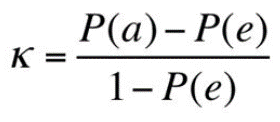

Two annotaters *A1* and *A2*

Observed Agreement:
*P(a)* = *P(A1=spam, A2=spam)* + *P(A1=ham, A2=ham)* + *P(A1=neutral, A2-neutral)*

Expected Agreement:
*P(e)* = *P(A1=spam)* * *P(A2=spam)* + *P(A1=ham)* * *P(A2=ham)* + *P(A1=neutral)* * *P(A2=neutral)*

In [8]:
observed_agreement = (spam_spam/total) + (ham_ham/total) + (neutral_neutral/total)
expected_agreeement = (ann_1_spam/total * ann_2_spam/total) + (ann_1_ham/total * ann_2_ham/total) + (ann_1_neutral/total * ann_2_neutral/total)
kappa = (observed_agreement - expected_agreeement) / (1 - expected_agreeement)

In [9]:
print(f"Observed Agreement: {observed_agreement}")
print(f"Expected Agreement: {expected_agreeement}")
print(f"Kappa: {kappa}")

Observed Agreement: 0.88
Expected Agreement: 0.46757499999999996
Kappa: 0.7746161431187492


### Results
**Landis and Koch, 1977** came up with the following interpretation of the coefficient. Their interpretation was:

*slight < 0.2 < fair < 0.4 < moderate < 0.6 < substantial < 0.8 < perfect*

*Others also state that any value above around 0.75 is a high agreement and shows that the data is reliable.* 

We obtained a value of **0.77**, showing a high agreement between the annotaters. Whilst this does not fit into the perfect category by **Landis and Koch, 1977**, we believe we can safely state that the agreement on the categorisation for our dataset is high and we can safely use this to train a neural network, without introducing contradiction to the network.

Landis, J. R., & Koch, G. G. (1977). The Measurement of Observer Agreement for Categorical Data. Biometrics, 33(1), 159–174. https://doi.org/10.2307/2529310

### Measuring Agreement of Spam vs Not Spam
As the main goal of our model is to achieve high precision and accuracy on identifying spam, we chose to measure the agreement between the annotaters purely looking at *spam* vs *not spam* (*ham* and *neutral*).

To do this we use the same formula as before except this time:

Observed Agreement:
*P(a)* = *P(A1=spam, A2=spam)* + *P(A1=ham OR neutral, A2=ham OR neutral)*

Expected Agreement:
*P(e)* = *P(A1=spam)* * *P(A2=spam)* + *P(A1=ham OR neutral)* * *P(A2=ham OR neutral)*

In [10]:
observed_agreement = (spam_spam/total) + ((ham_ham + neutral_neutral + ham_neutral + neutral_ham)/total)
expected_agreeement = (ann_1_spam/total * ann_2_spam/total) + ((ann_1_ham + ann_1_neutral)/total * (ann_2_ham + ann_2_neutral)/total)
kappa = (observed_agreement - expected_agreeement) / (1 - expected_agreeement)

print(f"Observed Agreement: {observed_agreement}")
print(f"Expected Agreement: {expected_agreeement}")
print(f"Kappa: {kappa}")

Observed Agreement: 0.985
Expected Agreement: 0.8321
Kappa: 0.9106611078022632


#### Results
We obtained a value of **0.91**, showing a very high agreement between the annotaters for deciding between *spam* and *not spam*. From both this test and the previous we are confident that our data is reliable, and therefore will allow the model to train and learn without introducing unreliable data to it.

## Sampling Bias
Sampling bias occurs when the dataset collected doesn't represent the true distribution. We did not need to carry out any test to assess the sampling of our dataset, as our method of collecting the data inherentely ensures the distribution matches the population.

### Our Method
As described in the [README](../data/comments/README.md) in the `data/comments/` folder, we gathered our data across 9 different categories of videos on YouTube. These categories were chosen as they represent the most typical video categories on YouTube (most of these are categories defined in YouTube iteself). We selected 10 recent videos from each class resulting in 90 videos. This provides us with a list of videos that are equally spread across the categories of videos. Typically certain videos contain more spam than others, so picking multiple categories creates a similar proportion of spam to that of the entire population. Thus our method of gathering the data gives us proportions that are very close to the proportions of the entire population.